In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/AXISBANK_historical_candle_data.csv", parse_dates=['timestamp'], index_col = 'timestamp')

(array([ 4008.,  6375.,  5074.,  6891.,  8439.,  9052.,  9479., 11669.,
         4431.,  1409.]),
 array([ 619.  ,  690.87,  762.74,  834.61,  906.48,  978.35, 1050.22,
        1122.09, 1193.96, 1265.83, 1337.7 ]),
 <BarContainer object of 10 artists>)

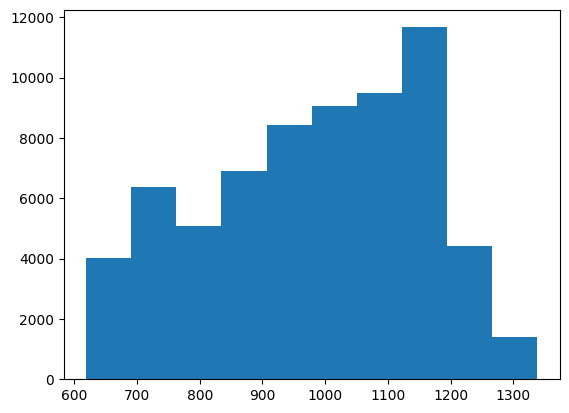

In [ ]:
plt.hist(df["close"])

(array([ 4008.,  6370.,  5073.,  6892.,  8446.,  9043.,  9488., 11652.,
         4448.,  1407.]),
 array([ 618.95 ,  690.825,  762.7  ,  834.575,  906.45 ,  978.325,
        1050.2  , 1122.075, 1193.95 , 1265.825, 1337.7  ]),
 <BarContainer object of 10 artists>)

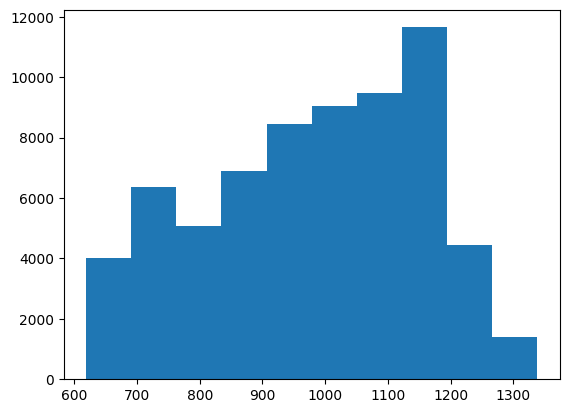

In [ ]:
plt.hist(df["open"])

In [ ]:
df_30min_correct = df.resample('30T', origin='start', label='right').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

# Filter only for market hours if needed
df_30min_correct = df_30min_correct.between_time('09:15', '15:30')
print(df_30min_correct.head(3))

                       open    high     low   close  volume
timestamp                                                  
2022-01-03 09:45:00  680.25  683.65  679.00  681.95  727081
2022-01-03 10:15:00  681.95  687.50  681.75  687.20  583417
2022-01-03 10:45:00  687.30  690.95  686.10  689.70  980431


/tmp/ipython-input-2197612373.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_30min_correct = df.resample('30T', origin='start', label='right').agg({


In [ ]:
df_30min_correct

,open,high,low,close,volume
timestamp,,,,,
2022-01-03 09:45:00,680.25,683.65,679.00,681.95,727081
2022-01-03 10:15:00,681.95,687.50,681.75,687.20,583417
2022-01-03 10:45:00,687.30,690.95,686.10,689.70,980431
2022-01-03 11:15:00,689.70,691.50,688.00,691.40,588828
2022-01-03 11:45:00,691.65,693.00,690.50,692.25,569326
...,...,...,...,...,...
2025-08-08 13:15:00,1059.50,1063.90,1059.30,1062.00,380394
2025-08-08 13:45:00,1062.00,1063.60,1060.50,1063.20,240833
2025-08-08 14:15:00,1063.20,1063.30,1060.10,1061.30,244204


In [ ]:
ts = df_30min_correct['close'].copy()
print(f"Time series length: {len(ts)}")
print(f"Date range: {ts.index.min()} to {ts.index.max()}")
print("\nBasic Statistics:")
print(ts.describe())

Time series length: 10690
Date range: 2022-01-03 09:45:00 to 2025-08-08 15:15:00

Basic Statistics:
count    10690.000000
mean       979.832036
std        172.271749
min        620.950000
25%        850.650000
50%        993.350000
75%       1126.737500
max       1332.950000
Name: close, dtype: float64


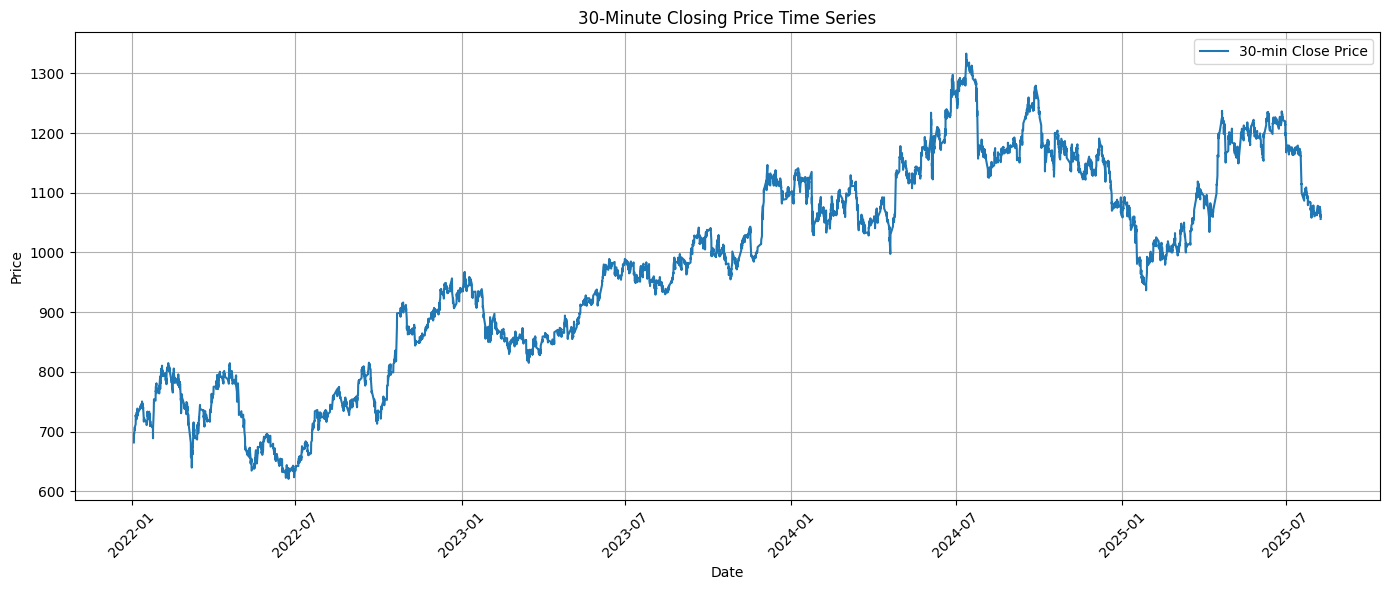

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(ts.index, ts.values, label='30-min Close Price')
plt.title('30-Minute Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
rolling_mean = ts.rolling(200).mean().dropna().copy()

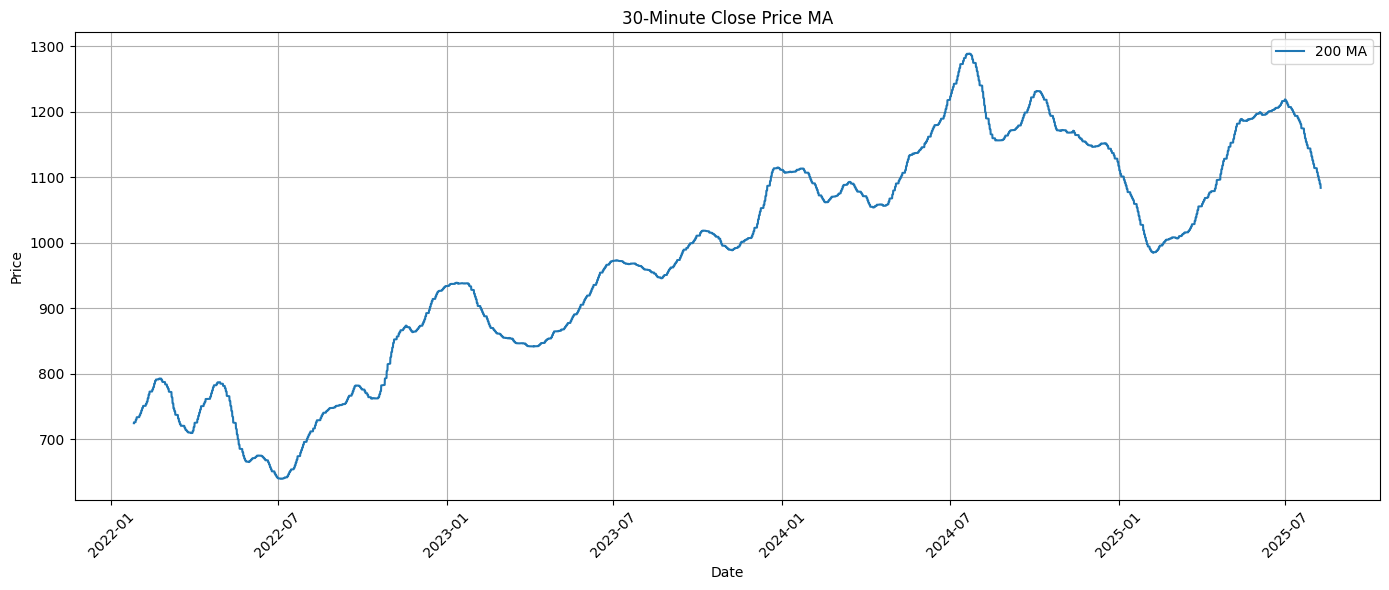

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(rolling_mean.index, rolling_mean.values, label='200 MA')
plt.title('30-Minute Close Price MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dfoutput['p-value'] < 0.05:
        print("\n-> Series is likely stationary (reject the null hypothesis of a unit root).")
    else:
        print("\n-> Series is likely non-stationary (cannot reject the null hypothesis).")

print("--- Testing Raw Price Series for Stationarity ---")
adf_test(ts)

--- Testing Raw Price Series for Stationarity ---
Results of Dickey-Fuller Test:
Test Statistic                    -1.823628
p-value                            0.368796
#Lags Used                         0.000000
Number of Observations Used    10689.000000
Critical Value (1%)               -3.430962
Critical Value (5%)               -2.861810
Critical Value (10%)              -2.566914
dtype: float64

-> Series is likely non-stationary (cannot reject the null hypothesis).


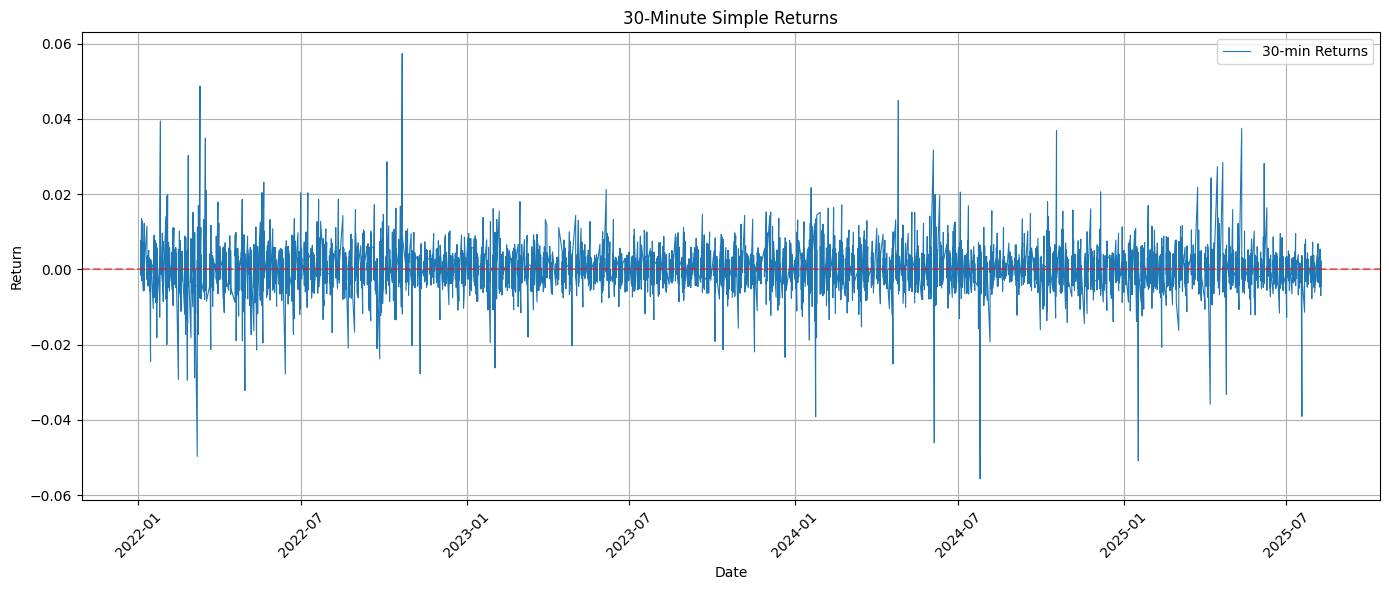


--- Testing Returns Series for Stationarity ---
Results of Dickey-Fuller Test:
Test Statistic                  -102.632668
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    10688.000000
Critical Value (1%)               -3.430962
Critical Value (5%)               -2.861810
Critical Value (10%)              -2.566914
dtype: float64

-> Series is likely stationary (reject the null hypothesis of a unit root).

Kurtosis: 20.6456 (>3 indicates heavier tails than normal)


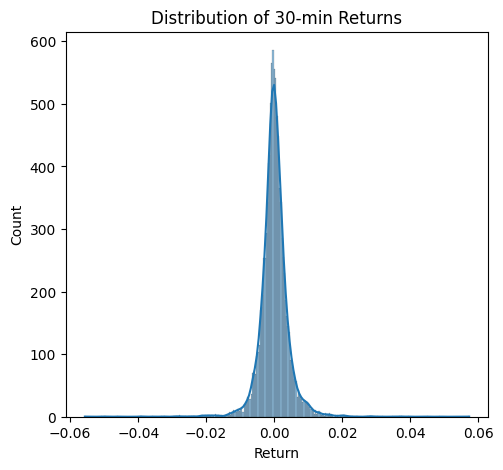

In [ ]:
returns = ts.pct_change().dropna()
returns.name = 'Returns'

# Plot the returns series
plt.figure(figsize=(14, 6))
plt.plot(returns.index, returns.values, label='30-min Returns', linewidth=0.8)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.title('30-Minute Simple Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check stationarity of returns
print("\n--- Testing Returns Series for Stationarity ---")
adf_test(returns)

# Plot distribution of returns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(returns, kde=True)
plt.title('Distribution of 30-min Returns')
plt.xlabel('Return')

print(f"\nKurtosis: {returns.kurtosis():.4f} (>3 indicates heavier tails than normal)")
# print(f"Skewness: {returns.skewness():.4f} (<0 means left-skewed)")

In [ ]:
df_30min_correct['return'] = df_30min_correct['close'].pct_change()

## Since kurtosis is 20 which is a a very high value which shows that there are long tails in normal distribution , only using ARIMA would not be a good approach

In [ ]:
df_30min_correct['date'] = df_30min_correct.index.date
df_30min_correct['time'] = df_30min_correct.index.time

# Group by date and mark the first occurrence for each day
first_bars = df_30min_correct.groupby('date').head(1).index
df_30min_correct['is_first_bar'] = False
df_30min_correct.loc[first_bars, 'is_first_bar'] = True

# Clean up temporary columns
df_30min_correct = df_30min_correct.drop(['date', 'time'], axis=1)

print(f"Number of overnight gaps identified: {df_30min_correct['is_first_bar'].sum()}")

Number of overnight gaps identified: 892


In [ ]:
df_30min_correct

,open,high,low,close,volume,return,is_first_bar
timestamp,,,,,,,
2022-01-03 09:45:00,680.25,683.65,679.00,681.95,727081,NaN,True
2022-01-03 10:15:00,681.95,687.50,681.75,687.20,583417,0.007699,False
2022-01-03 10:45:00,687.30,690.95,686.10,689.70,980431,0.003638,False
2022-01-03 11:15:00,689.70,691.50,688.00,691.40,588828,0.002465,False
2022-01-03 11:45:00,691.65,693.00,690.50,692.25,569326,0.001229,False
...,...,...,...,...,...,...,...
2025-08-08 13:15:00,1059.50,1063.90,1059.30,1062.00,380394,0.002360,False
2025-08-08 13:45:00,1062.00,1063.60,1060.50,1063.20,240833,0.001130,False
2025-08-08 14:15:00,1063.20,1063.30,1060.10,1061.30,244204,-0.001787,False


--- Summary Statistics ---
All Returns - Kurtosis: 20.6456
Intraday Returns - Kurtosis: 3.9427
Overnight Gaps - Kurtosis: 5.4048

Number of Overnight Gaps: 892
Number of Intraday Returns: 9798


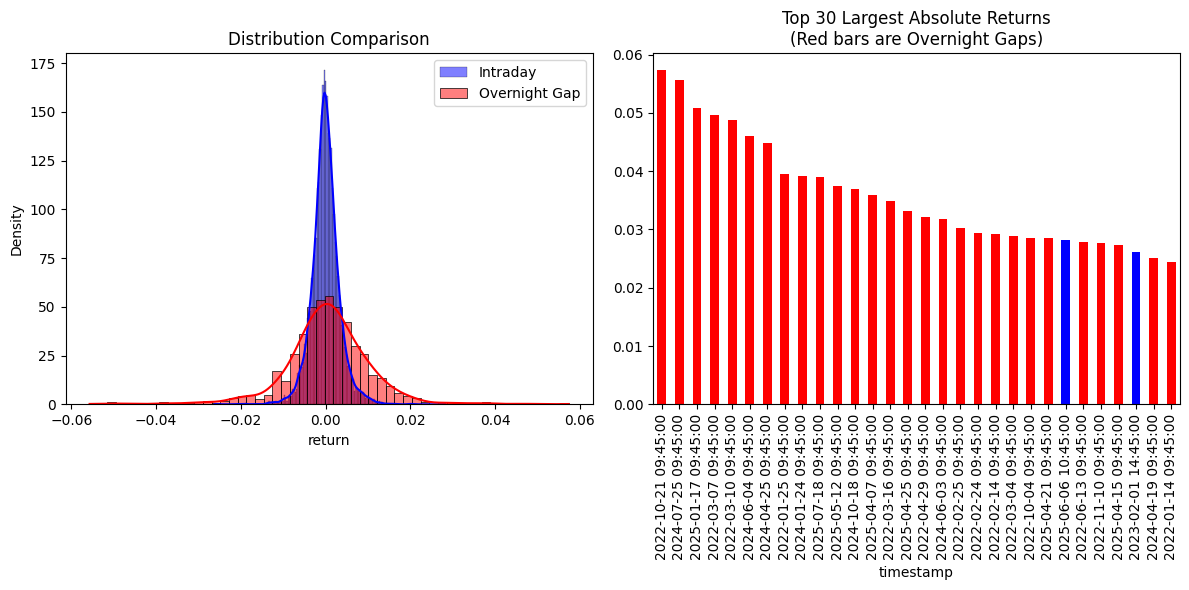

In [ ]:
overnight_gaps = df_30min_correct[df_30min_correct['is_first_bar']]['return'].copy()
intraday_returns = df_30min_correct[~df_30min_correct['is_first_bar']]['return'].copy()

print("--- Summary Statistics ---")
print(f"All Returns - Kurtosis: {df_30min_correct['return'].kurtosis():.4f}")
print(f"Intraday Returns - Kurtosis: {intraday_returns.kurtosis():.4f}")
print(f"Overnight Gaps - Kurtosis: {overnight_gaps.kurtosis():.4f}")

print(f"\nNumber of Overnight Gaps: {len(overnight_gaps)}")
print(f"Number of Intraday Returns: {len(intraday_returns)}")

# Plot the distributions to see the difference
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(intraday_returns.dropna(), kde=True, color='blue', label='Intraday', stat='density')
sns.histplot(overnight_gaps.dropna(), kde=True, color='red', label='Overnight Gap', stat='density')
plt.title('Distribution Comparison')
plt.legend()

plt.subplot(1, 2, 2)
# Plot the largest absolute returns to see how many are gaps
all_returns_abs = df_30min_correct['return'].abs().sort_values(ascending=False)
# Plot the top N largest moves
top_n = 30
all_returns_abs.head(top_n).plot(kind='bar', title=f'Top {top_n} Largest Absolute Returns\n(Red bars are Overnight Gaps)', color=['red' if x in overnight_gaps.index else 'blue' for x in all_returns_abs.head(top_n).index])
plt.tight_layout()
plt.show()

All Returns (Kurtosis: 20.65): This was the problematic, inflated number that made ARIMA seem impossible. It was indeed contaminated by mixing different types of returns.

Intraday Returns (Kurtosis: 3.94): This is a massive improvement. A kurtosis of 3.94 is much closer to the normal distribution's kurtosis of 3. This suggests that the within-day 30-minute returns have mild fat tails, which is very normal and manageable for financial data.

Overnight Gaps (Kurtosis: 5.40): As expected, these are more extreme than intraday returns, confirming they are a different, more volatile phenomenon.

In [ ]:
df_30min_correct

,open,high,low,close,volume,return,is_first_bar
timestamp,,,,,,,
2022-01-03 09:45:00,680.25,683.65,679.00,681.95,727081,NaN,True
2022-01-03 10:15:00,681.95,687.50,681.75,687.20,583417,0.007699,False
2022-01-03 10:45:00,687.30,690.95,686.10,689.70,980431,0.003638,False
2022-01-03 11:15:00,689.70,691.50,688.00,691.40,588828,0.002465,False
2022-01-03 11:45:00,691.65,693.00,690.50,692.25,569326,0.001229,False
...,...,...,...,...,...,...,...
2025-08-08 13:15:00,1059.50,1063.90,1059.30,1062.00,380394,0.002360,False
2025-08-08 13:45:00,1062.00,1063.60,1060.50,1063.20,240833,0.001130,False
2025-08-08 14:15:00,1063.20,1063.30,1060.10,1061.30,244204,-0.001787,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

# 1. Load your prepared DataFrame (assuming it's already loaded as df_30min_correct)
# df_30min_correct should have DateTimeIndex and OHLCV columns + 'is_first_bar'

# Calculate returns for the entire series
df_30min_correct['return'] = df_30min_correct['close'].pct_change()

# Create the two series for comparison
series_option2 = df_30min_correct['return'].dropna()  # OPTION 2: All returns (contaminated)
series_option1 = df_30min_correct[~df_30min_correct['is_first_bar']]['return'].dropna()  # OPTION 1: Clean intraday

print("="*60)
print("DATASET COMPARISON")
print("="*60)
print(f"Option 2 (All Returns): {len(series_option2)} samples, Kurtosis: {series_option2.kurtosis():.4f}")
print(f"Option 1 (Clean Intraday): {len(series_option1)} samples, Kurtosis: {series_option1.kurtosis():.4f}")

DATASET COMPARISON
Option 2 (All Returns): 10689 samples, Kurtosis: 20.6456
Option 1 (Clean Intraday): 9798 samples, Kurtosis: 3.9427


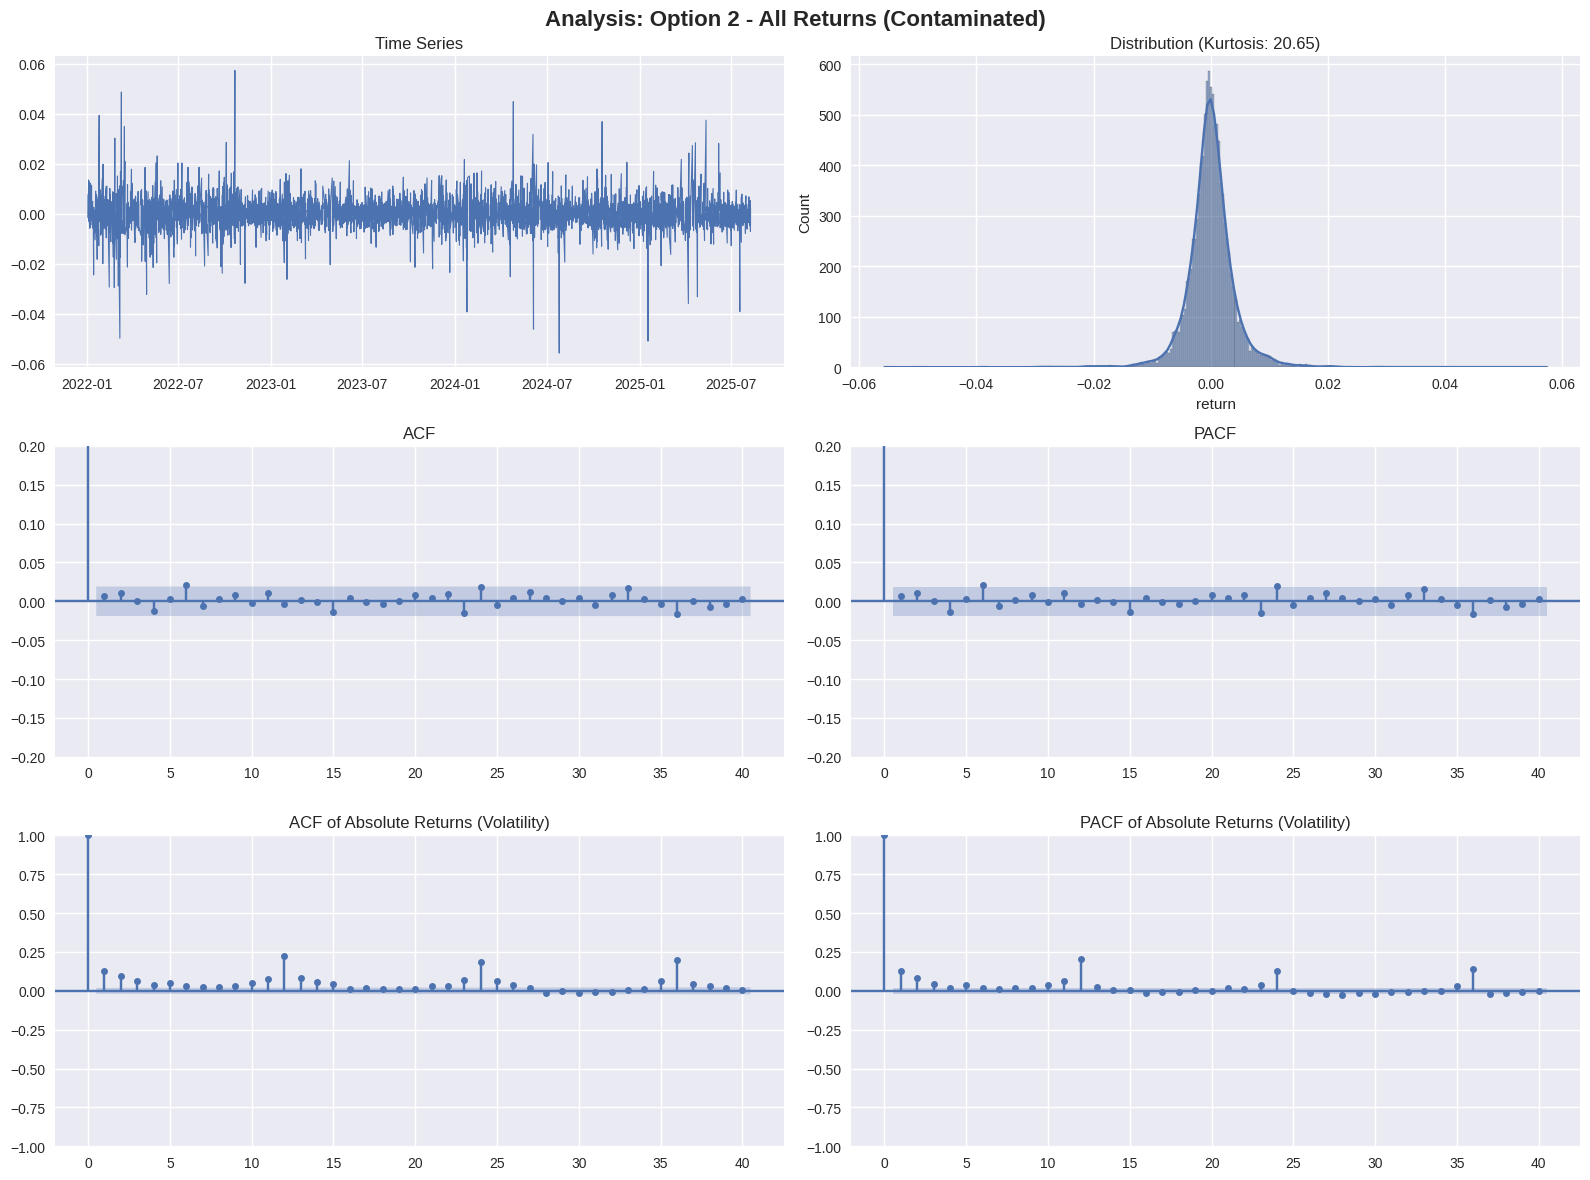


ADF Test for Option 2 - All Returns (Contaminated):
Test Statistic: -102.6327
p-value: 0.0000
Stationary: True


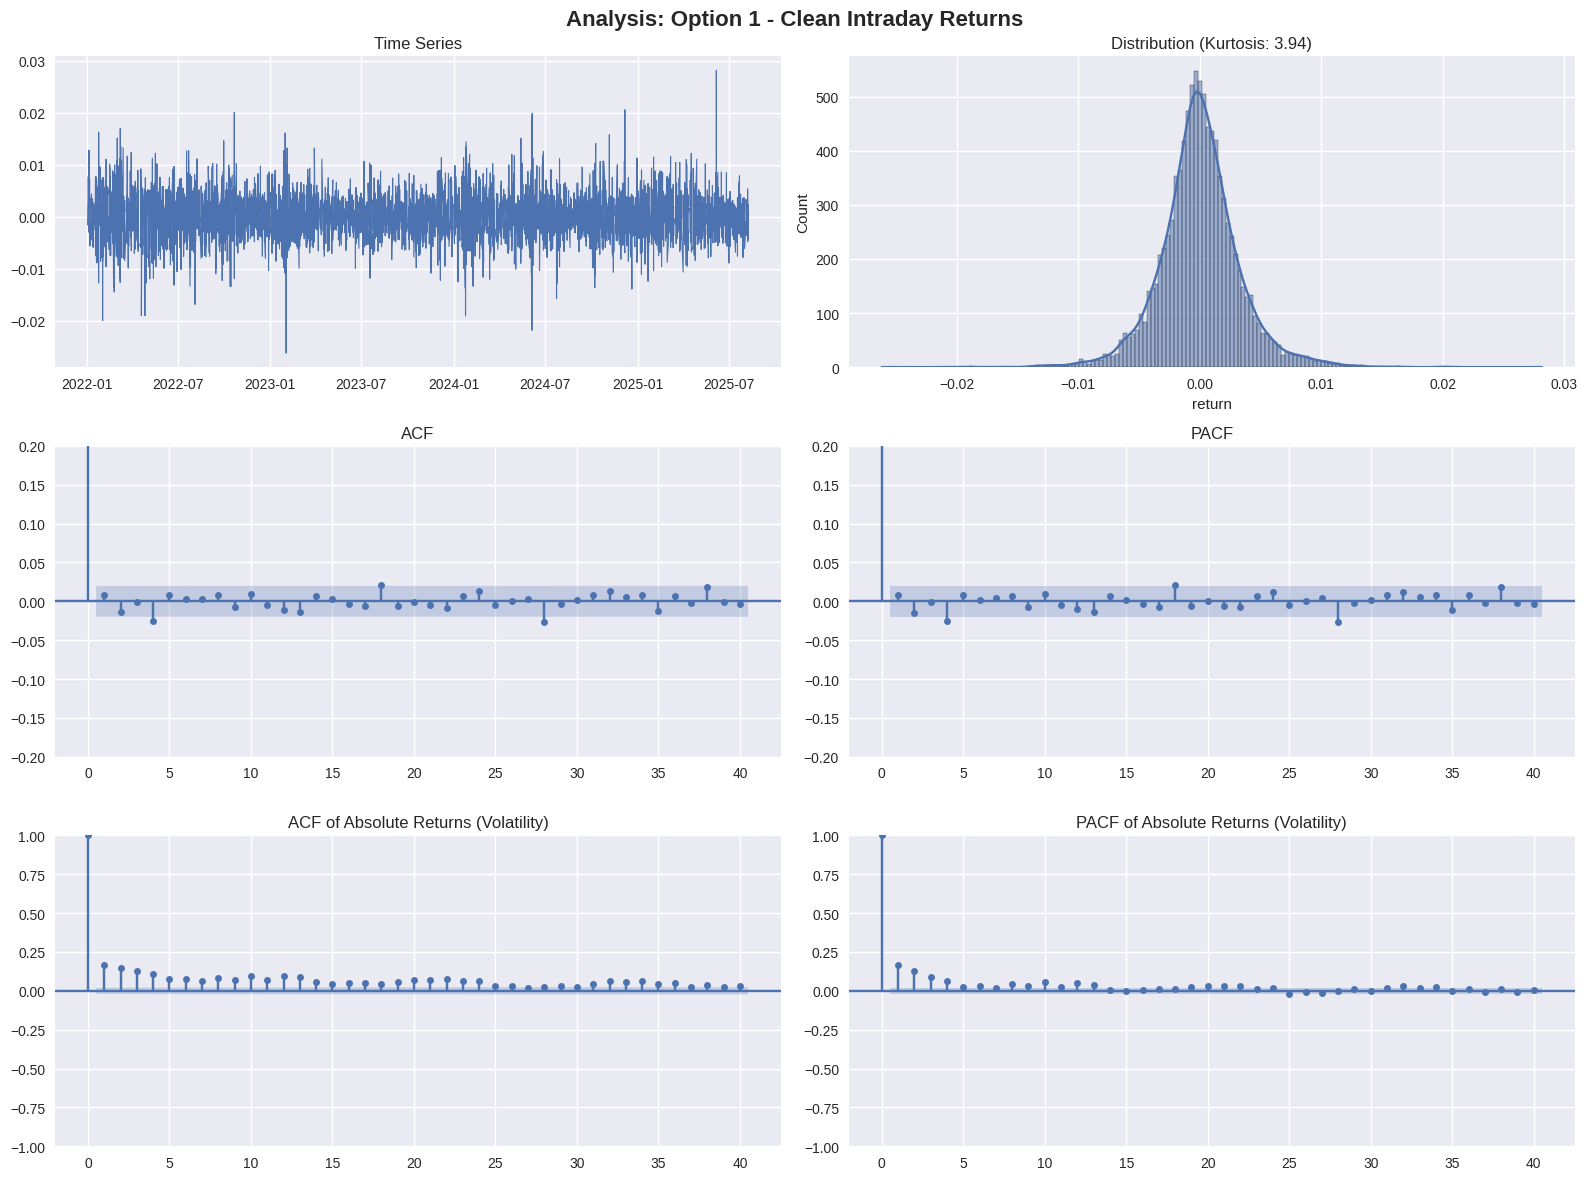


ADF Test for Option 1 - Clean Intraday Returns:
Test Statistic: -51.0331
p-value: 0.0000
Stationary: True


In [ ]:
def analyze_autocorrelation(series, title):
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle(f'Analysis: {title}', fontsize=16, fontweight='bold')

    # Plot raw series
    axes[0,0].plot(series.index, series.values, linewidth=0.8)
    axes[0,0].set_title('Time Series')
    axes[0,0].grid(True)

    # Plot distribution
    sns.histplot(series, kde=True, ax=axes[0,1])
    axes[0,1].set_title(f'Distribution (Kurtosis: {series.kurtosis():.2f})')

    # ACF plot
    plot_acf(series, lags=40, alpha=0.05, ax=axes[1,0], title='ACF')
    axes[1,0].set_ylim(-0.2, 0.2)  # Standardize y-axis for comparison

    # PACF plot
    plot_pacf(series, lags=40, alpha=0.05, ax=axes[1,1], title='PACF')
    axes[1,1].set_ylim(-0.2, 0.2)  # Standardize y-axis for comparison

    # ACF of absolute returns (volatility clustering)
    plot_acf(np.abs(series), lags=40, alpha=0.05, ax=axes[2,0], title='ACF of Absolute Returns (Volatility)')

    # PACF of absolute returns
    plot_pacf(np.abs(series), lags=40, alpha=0.05, ax=axes[2,1], title='PACF of Absolute Returns (Volatility)')

    plt.tight_layout()
    plt.show()

    # ADF test
    print(f"\nADF Test for {title}:")
    adf_result = adfuller(series)
    print(f"Test Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print(f"Stationary: {adf_result[1] < 0.05}")

# 3. Analyze both series
analyze_autocorrelation(series_option2, "Option 2 - All Returns (Contaminated)")
analyze_autocorrelation(series_option1, "Option 1 - Clean Intraday Returns")

In [ ]:
def find_best_arima(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None
    best_model = None

    print(f"\nSearching for best ARIMA parameters (p,d=0,q)...")
    for p in range(0, max_p+1):
        for q in range(0, max_q+1):
            if p == 0 and q == 0:
                continue  # Skip ARIMA(0,0,0)
            try:
                model = ARIMA(series, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
                print(f"ARIMA({p},0,{q}) - AIC: {model_fit.aic:.2f}")
            except:
                continue

    print(f"\nBest Model: ARIMA{best_order} with AIC: {best_aic:.2f}")
    return best_order, best_model

In [ ]:
print("\nFor Option 2 (All Returns):")
best_order_option2, best_model_option2 = find_best_arima(series_option2)

print("\nFor Option 1 (Clean Intraday):")
best_order_option1, best_model_option1 = find_best_arima(series_option1)


For Option 2 (All Returns):

Searching for best ARIMA parameters (p,d=0,q)...
ARIMA(0,0,1) - AIC: -85803.14
ARIMA(0,0,2) - AIC: -85802.42
ARIMA(0,0,3) - AIC: -85800.43
ARIMA(1,0,0) - AIC: -85803.15
ARIMA(1,0,1) - AIC: -85801.68
ARIMA(1,0,2) - AIC: -85800.28
ARIMA(1,0,3) - AIC: -85798.45
ARIMA(2,0,0) - AIC: -85802.39
ARIMA(2,0,1) - AIC: -85800.39
ARIMA(2,0,2) - AIC: -85796.58
ARIMA(2,0,3) - AIC: -85798.97
ARIMA(3,0,0) - AIC: -85800.40
ARIMA(3,0,1) - AIC: -85798.40
ARIMA(3,0,2) - AIC: -85794.58
ARIMA(3,0,3) - AIC: -85796.66

Best Model: ARIMA(1, 0, 0) with AIC: -85803.15

For Option 1 (Clean Intraday):

Searching for best ARIMA parameters (p,d=0,q)...
ARIMA(0,0,1) - AIC: -83918.51
ARIMA(0,0,2) - AIC: -83918.64
ARIMA(0,0,3) - AIC: -83916.64
ARIMA(1,0,0) - AIC: -83918.49
ARIMA(1,0,1) - AIC: -83917.50
ARIMA(1,0,2) - AIC: -83916.80
ARIMA(1,0,3) - AIC: -83914.55
ARIMA(2,0,0) - AIC: -83918.54
ARIMA(2,0,1) - AIC: -83916.57
ARIMA(2,0,2) - AIC: -83916.59
ARIMA(2,0,3) - AIC: -83914.60
ARIMA(3,0,0

In [ ]:
def evaluate_arima_model(series, order, series_name):
    # Time-based split (80/20)
    train_size = int(len(series) * 0.8)
    train, test = series.iloc[:train_size], series.iloc[train_size:]

    print(f"\n{'='*50}")
    print(f"EVALUATING {series_name}")
    print(f"{'='*50}")
    print(f"Training: {train.index[0]} to {train.index[-1]} ({len(train)} samples)")
    print(f"Testing:  {test.index[0]} to {test.index[-1]} ({len(test)} samples)")

    # Fit model
    print("Fitting Model")
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Make one-step ahead predictions (avoids look-ahead bias)
    predictions = []
    history = list(train)
    print("Making predictions")
    for i in range(len(test)):
        print(i)
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test.iloc[i])

    predictions = pd.Series(predictions, index=test.index)

    # Calculate metrics
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    # Direction accuracy
    actual_direction = (test > 0).astype(int)
    predicted_direction = (predictions > 0).astype(int)
    accuracy = accuracy_score(actual_direction, predicted_direction)
    baseline_accuracy = actual_direction.mean()

    print(f"\nPerformance Metrics:")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"Direction Accuracy: {accuracy:.4f}")
    print(f"Baseline (Always Up): {baseline_accuracy:.4f}")
    print(f"Improvement over baseline: {accuracy - baseline_accuracy:+.4f}")

    # Plot results
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 1, 1)
    plt.plot(test.index, test.values, 'b-', label='Actual Returns', alpha=0.7)
    plt.plot(test.index, predictions.values, 'r-', label='Predicted Returns', alpha=0.7)
    plt.title(f'{series_name} - Actual vs Predicted Returns\nARIMA{order}')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    correct_predictions = (predicted_direction == actual_direction)
    plt.scatter(test.index, actual_direction, c=correct_predictions.map({True: 'green', False: 'red'}),
                alpha=0.6, s=20)
    plt.title(f'Direction Predictions (Green=Correct, Red=Wrong)\nAccuracy: {accuracy:.3f}')
    plt.yticks([0, 1], ['Down', 'Up'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return accuracy, rmse

MODEL EVALUATION RESULTS

EVALUATING OPTION 2 - All Returns
Training: 2022-01-03 10:15:00 to 2024-11-22 14:15:00 (8551 samples)
Testing:  2024-11-22 14:45:00 to 2025-08-08 15:15:00 (2138 samples)
Fitting Model
Making predictions
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
2

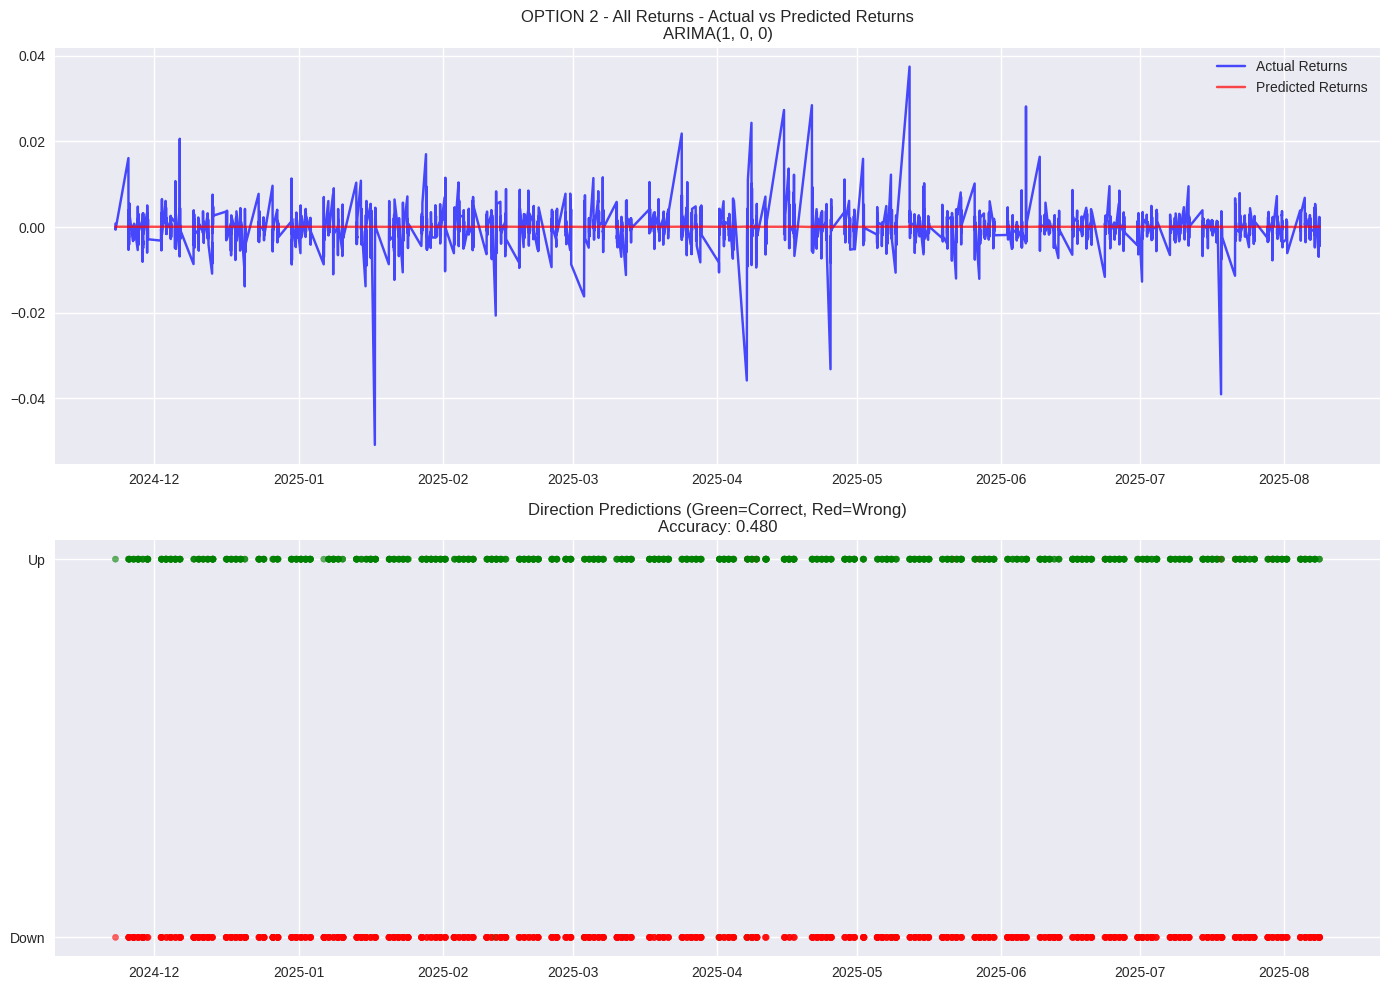


EVALUATING OPTION 1 - Clean Intraday
Training: 2022-01-03 10:15:00 to 2024-11-22 14:15:00 (7838 samples)
Testing:  2024-11-22 14:45:00 to 2025-08-08 15:15:00 (1960 samples)
Fitting Model
Making predictions
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225

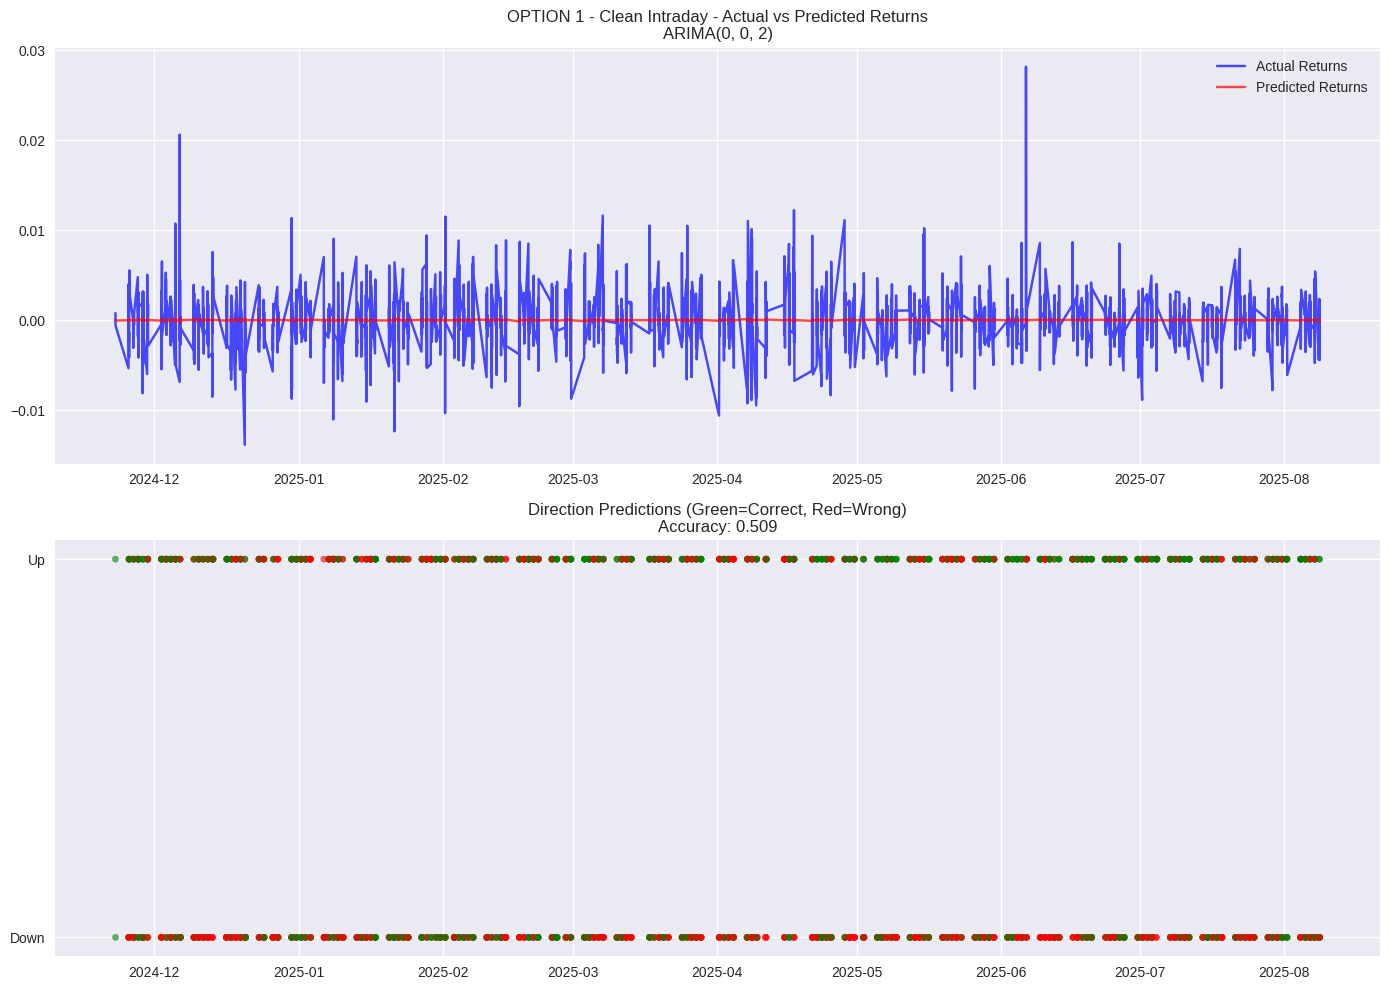

FINAL COMPARISON
Metric                    Option 2     Option 1     Difference  
------------------------------------------------------------
Best ARIMA Order          (1, 0, 0)    (0, 0, 2)    -
Direction Accuracy        0.4804             0.5092             +0.0288
RMSE                      0.004111             0.003075             -0.001036
Kurtosis                  20.6456             3.9427             -16.7029

Diagnostics for best model (Option 1):
                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                 9798
Model:                 ARIMA(0, 0, 2)   Log Likelihood               41963.321
Date:                Sun, 14 Sep 2025   AIC                         -83918.642
Time:                        10:26:13   BIC                         -83889.883
Sample:                             0   HQIC                        -83908.897
                               - 9798                            

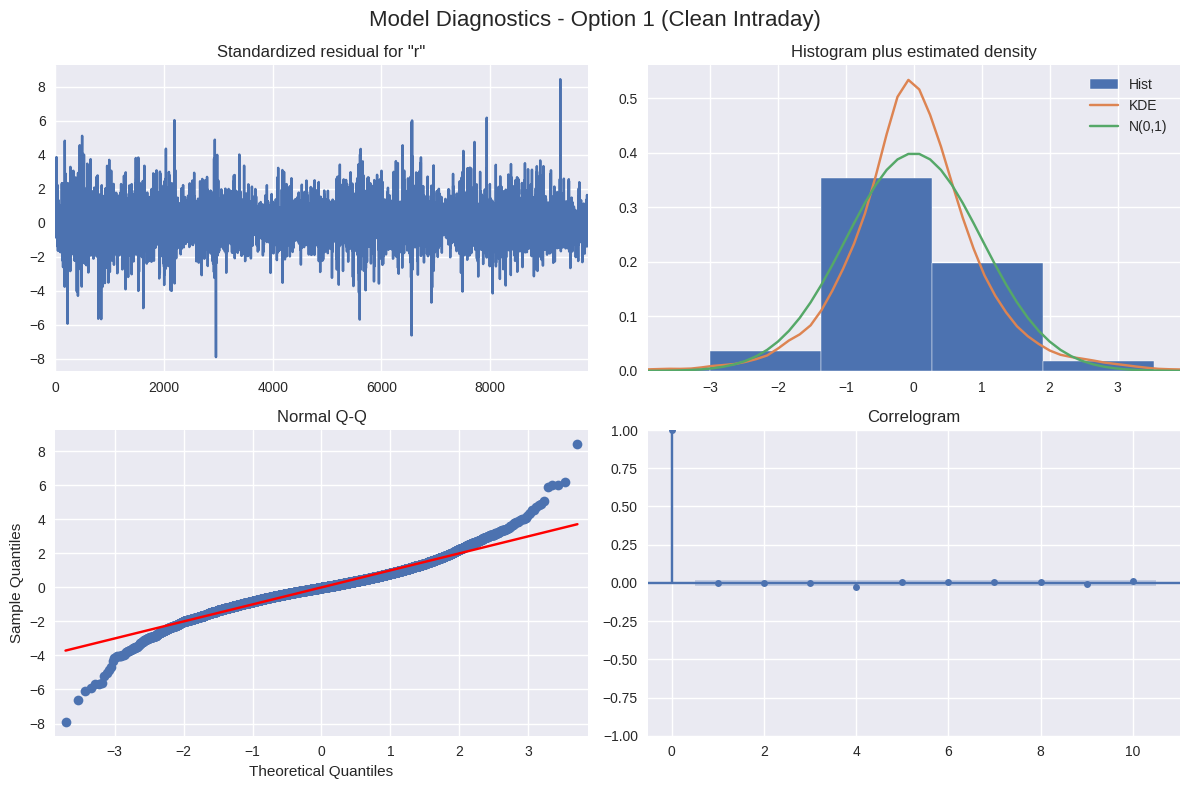

In [ ]:
print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

acc_option2, rmse_option2 = evaluate_arima_model(series_option2, best_order_option2, "OPTION 2 - All Returns")
acc_option1, rmse_option1 = evaluate_arima_model(series_option1, best_order_option1, "OPTION 1 - Clean Intraday")

# 8. Final comparison
print("="*60)
print("FINAL COMPARISON")
print("="*60)
print(f"{'Metric':<25} {'Option 2':<12} {'Option 1':<12} {'Difference':<12}")
print(f"{'-'*60}")
print(f"{'Best ARIMA Order':<25} {str(best_order_option2):<12} {str(best_order_option1):<12} {'-'}")
print(f"{'Direction Accuracy':<25} {acc_option2:.4f}{'':<12} {acc_option1:.4f}{'':<12} {acc_option1 - acc_option2:+.4f}")
print(f"{'RMSE':<25} {rmse_option2:.6f}{'':<12} {rmse_option1:.6f}{'':<12} {rmse_option1 - rmse_option2:+.6f}")
print(f"{'Kurtosis':<25} {series_option2.kurtosis():.4f}{'':<12} {series_option1.kurtosis():.4f}{'':<12} {series_option1.kurtosis() - series_option2.kurtosis():+.4f}")

# 9. Check residuals for the best model
print(f"\nDiagnostics for best model (Option 1):")
print(best_model_option1.summary())
fig = best_model_option1.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Model Diagnostics - Option 1 (Clean Intraday)', fontsize=16)
plt.tight_layout()
plt.show()